<img src="https://cdn.arstechnica.net/wp-content/uploads/2020/07/pokemon-go-masks-800x450.jpg">

In this lecture, we will continue to use the dataset with combat statistics of Pokémon to learn how to look at distributions of values between groups. All the plots that we use in this chapter have one common characteristic: one axis is category and the other is a continuous variable.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
# %matplotlib inline # to make sure that the plot generated by seaborn can be rendered and displayed inline on the
                   # jupyter notebook.
import seaborn as sns

pokemon_url="https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv"


Here are the descriptions of this dataset:
- \# - Pokedex entry number of the Pokemon
- Name - name of the Pokemon
- Type 1 - each Pokemon has a type, this determines weakness/resistance to attacks [referred to as the primary type]
- Type 2 - some Pokemon are dual type and have 2 [referred to as the secondary type]
- Total - sum of all stats that come after this, a general guide to how strong a Pokemon is
- HP - hit points, or health, defines how much damage a Pokemon can withstand before fainting
- Attack - the base modifier for normal attacks
- Defense - the base damage resistance against normal attacks
- Sp. Atk - special attack, the base modifier for special attacks
- Sp. Def - the base damage resistance against special attacks
- Speed - determines which Pokemon attacks first each round
- Generation - refers to which grouping/game series the Pokemon was released in
- Legendary - a boolean that identifies whether the Pokemon is legendary

In [2]:
pokemon = pd.read_csv(pokemon_url)
pokemon.head()
pokemon.isnull().sum()
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [3]:
pokemon.head(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [ ]:
### Returns unique value of Series Generation
pokemon.Generation.unique()

array([1, 2, 3, 4, 5, 6])

### Setting up a custom color schemes
Using a dictionary of hexcode we can assign custom colors to the different types of pokemon.  
[Pokemon Type Color Scheme Reference](https://www.epidemicjohto.com/t882-type-colors-hex-colors)

In [ ]:
pokemon_type_colors = {"Normal": "#A8A77A",
"Fire" : "#EE8130",
"Water" : "#6390F0",
"Electric" : "#F7D02C",
"Grass" : "#7AC74C",
"Ice" : "#96D9D6",
"Fighting" : "#C22E28",
"Poison" : "#A33EA1",
"Ground" : "#E2BF65",
"Flying" : "#A98FF3",
"Psychic" : "#F95587",
"Bug" : "#A6B91A",
"Rock" : "#B6A136",
"Ghost" : "#735797",
"Dragon" : '#6F35FC',
"Dark" : "#705746",
"Steel" : "#B7B7CE",
"Fairy" : "#D685AD"}

### Relplot
Plot data points with categorical variable on Y axis.

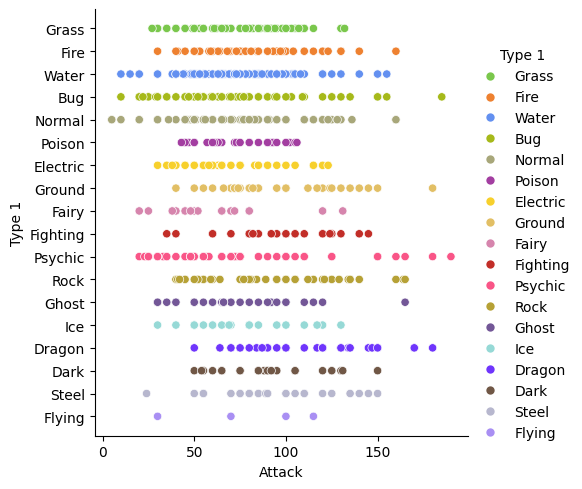

In [ ]:
sns.relplot(
    data=pokemon,
    x="Attack",
    y="Type 1",
    # aspect=1, # aspect change the aspect ratio
    # height=10, # height of each facet
    hue="Type 1",
    palette=pokemon_type_colors # using the defined palette
    );

### catplot default `Strip` plot
To look at the distribution of `Attack` for each group in `Type 1`, we can use the `catplot` function. This function shows the relationship between numerical and categorical variable. The default kind of categorical visual representation produced by `catplot` is called a **strip plot**.

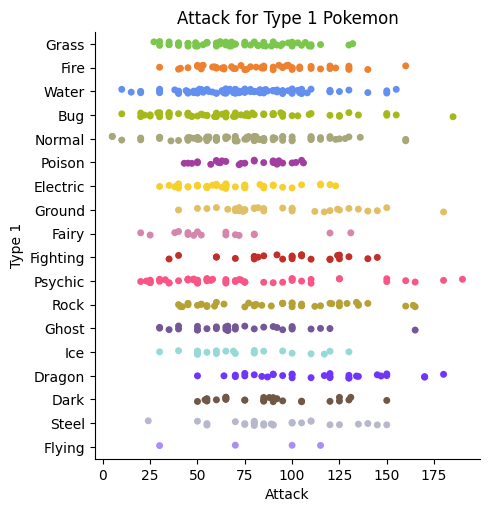

In [ ]:
sns.catplot(
    data=pokemon,
    x="Attack",
    y="Type 1",
    # aspect=1, # aspect change the aspect ratio
    # height=15,
    # jitter=0.5, # jitter spread out the data points
    hue="Type 1",
    palette=pokemon_type_colors
    )
plt.title("Attack for Type 1 Pokemon");

Just as we saw with `relplot` , `catplot` understands `hue`, `row` and `col` to map different categorical columns, so it’s possible to further subdivide the data.

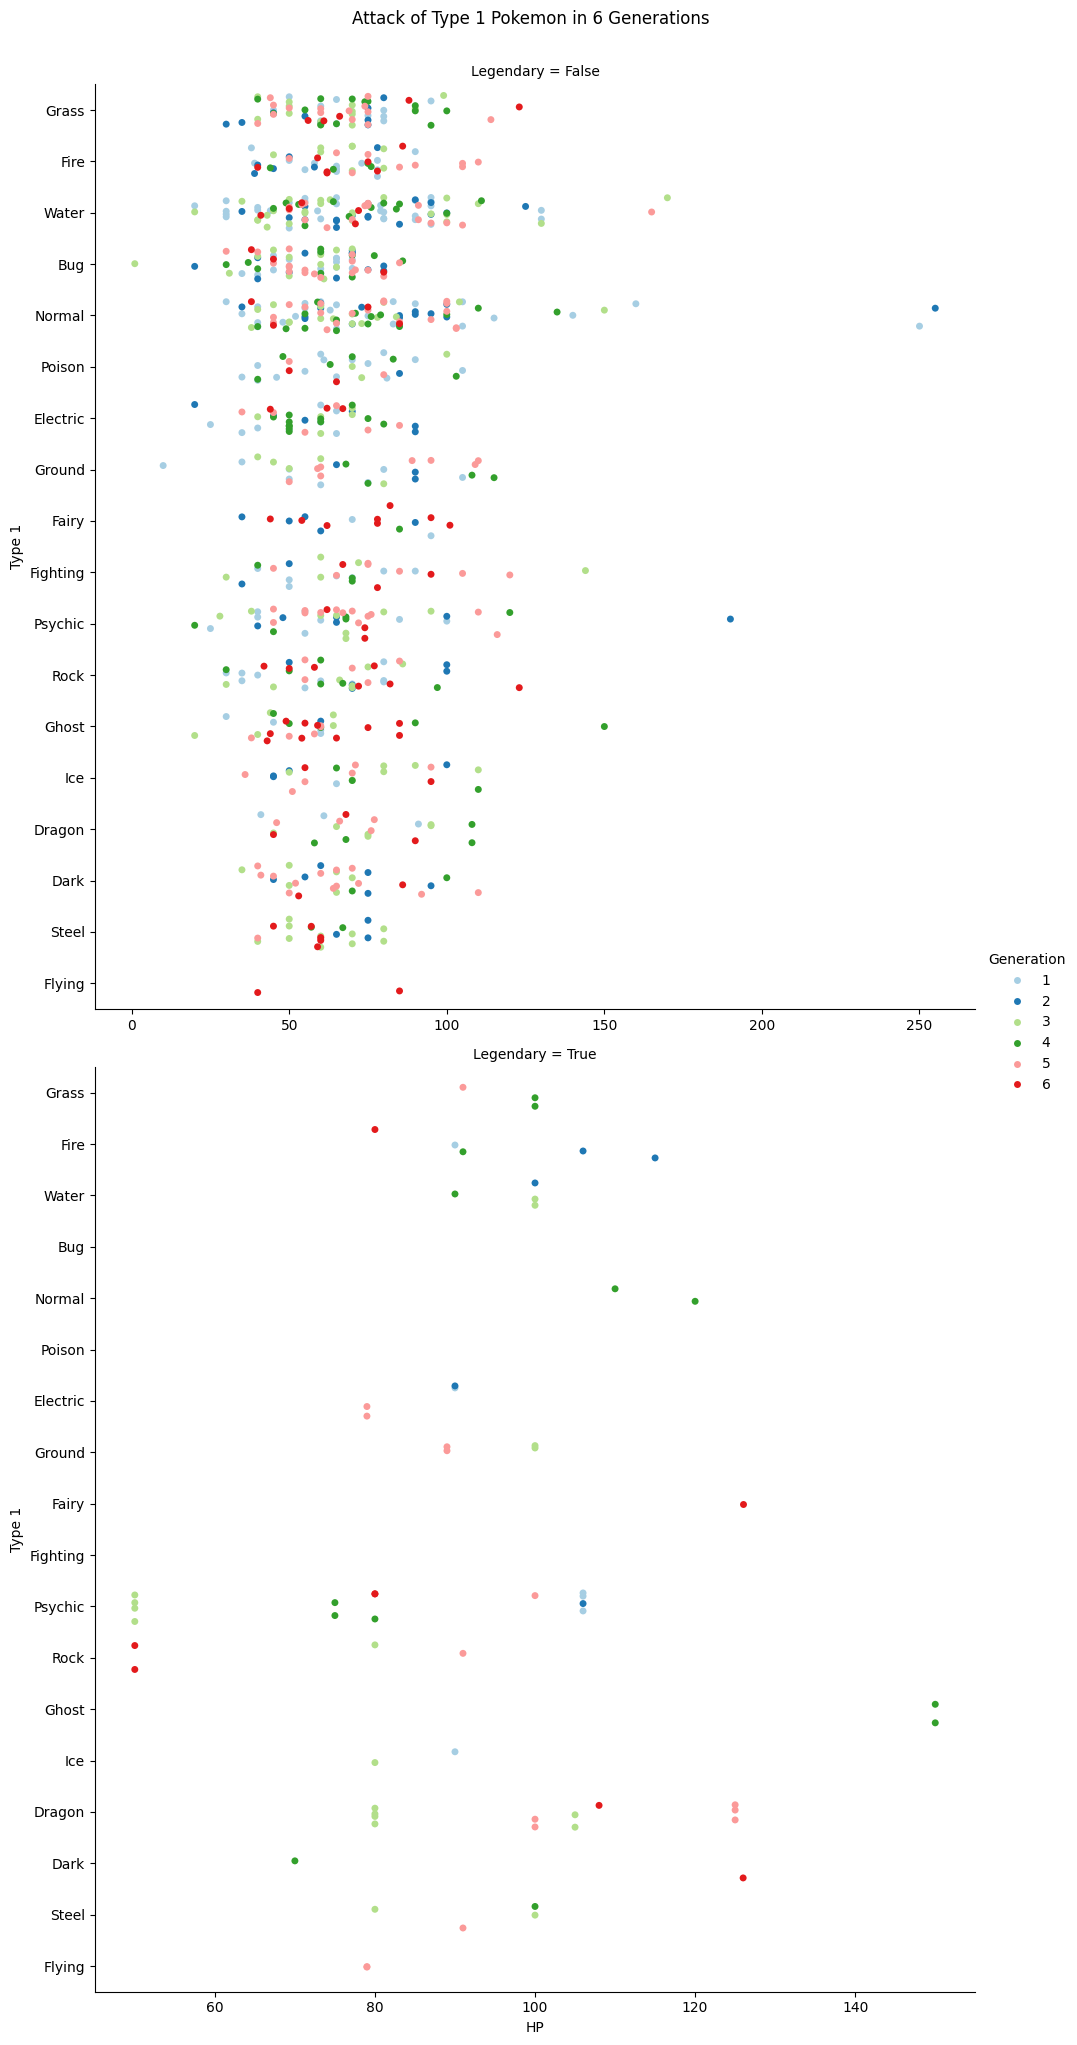

In [ ]:
g=sns.catplot(
    data=pokemon,
    x="HP",
    y="Type 1",
    aspect=1, # aspect ratio
    hue="Generation",
    row="Legendary",
    palette="Paired",
    jitter=0.3,
    height=10,
    # sharey=False, # share{x,y} if True will share axes across columns/row
    sharex=False
    )
g.fig.suptitle("Attack of Type 1 Pokemon in 6 Generations", y=1.02);

## Swarm plots
Our other option for plotting every point is a swarm plot, which we can get by passing `kind='swarm'` to the `catplot` function. Where a strip plot adds random noise to the points, a swarm plot uses a layout algorithm to try and prevent points overlapping.

In [ ]:
pokemon[["Attack", "Type 1"]]

,Attack,Type 1
0,49,Grass
1,62,Grass
2,82,Grass
3,100,Grass
4,52,Fire
...,...,...
795,100,Rock
796,160,Rock
797,110,Psychic
798,160,Psychic


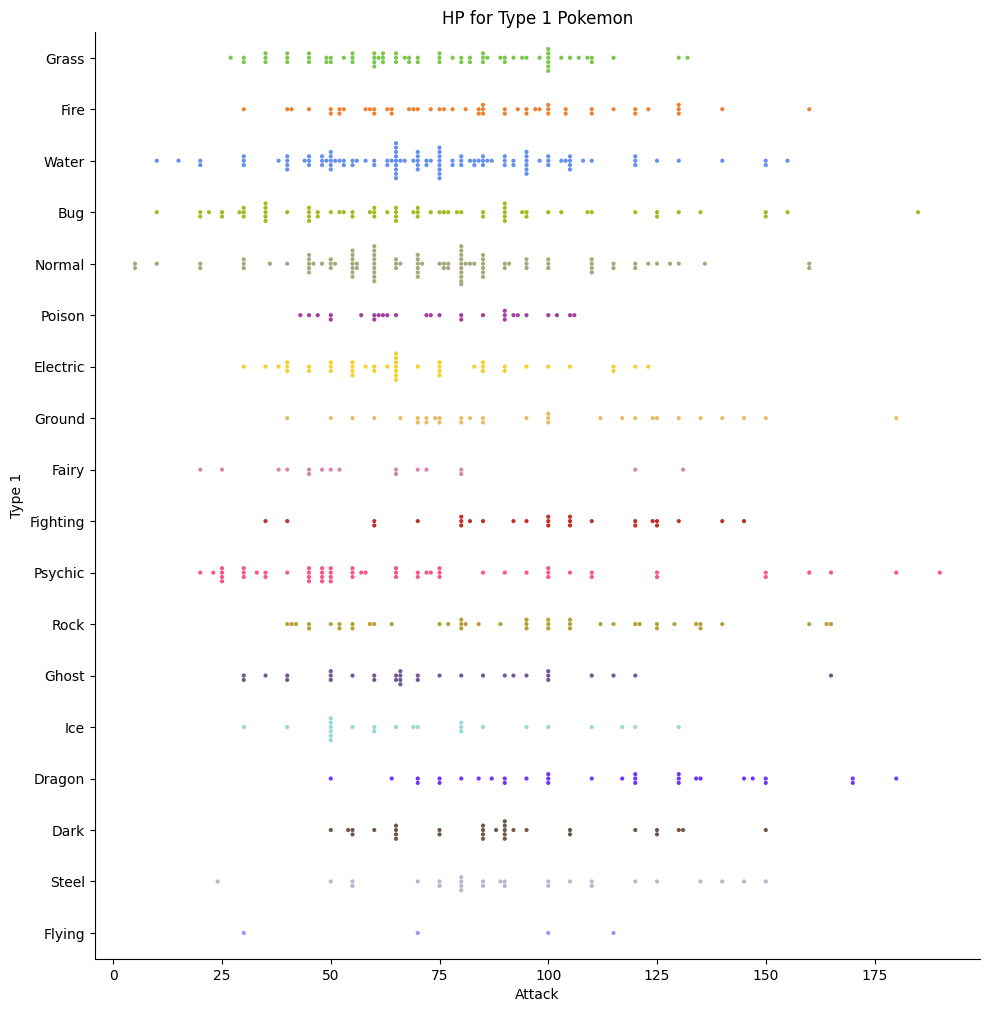

In [ ]:
sns.catplot(
    data=pokemon,
    x="Attack",
    y="Type 1",
    aspect=1, # aspect change the aspect ratio
    kind="swarm",
    height=10,
    # palette="Paired"
    hue="Type 1",
    palette=pokemon_type_colors,
    size=3
    )
plt.title("HP for Type 1 Pokemon");

## Box plots
Box plot is one of the most commonly used plot for visualizing data distribution. We can convert the swamp plot into a box plot by simply changing the kind argument to `kind="box"`

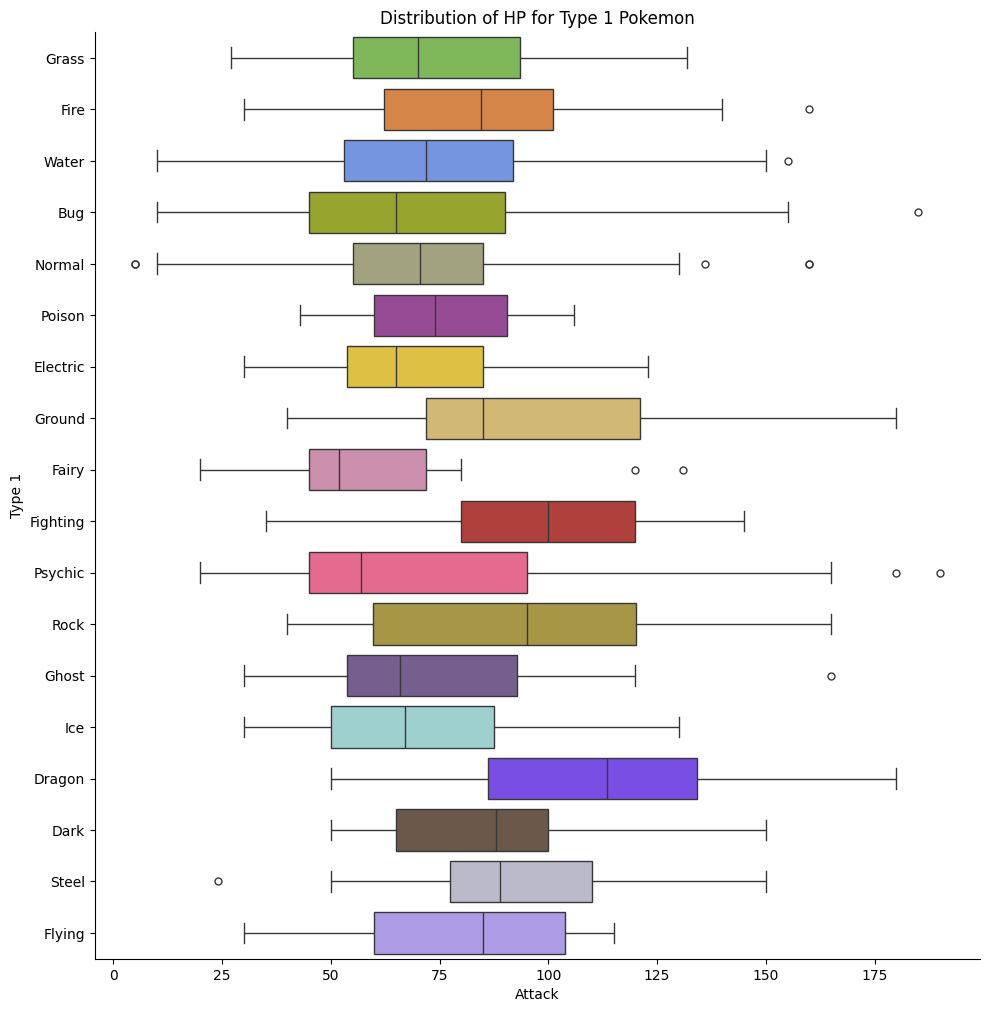

In [ ]:
sns.catplot(
    data=pokemon,
    x="Attack",
    y="Type 1",
    aspect=1, # aspect change the aspect ratio
    kind="box",
    height=10,
    # palette="Paired"
    hue="Type 1",
    palette=pokemon_type_colors,
    # dodge=False # dodge controls overlap of the plots
    )
plt.title("Distribution of HP for Type 1 Pokemon");

The boxplot above gives us a much more readable plot. For each category the box shows the range that encompasses 75% of the data along with a  line within the box to show us the median value. The whiskers show the range that includes 1.5 times the interquartile range beyond the box, and any values outside that are plotted as individual points. [Boxplots explained](https://www.simplypsychology.org/boxplots.html)

Because we are still using the `catplot` function to do the charting, we can still use color and small multiples using exactly the same set of arguments that we already know. This allows us to set up a complex plot with relatively little code.

In [ ]:
data = pokemon[
    (pokemon["Type 1"].isin(["Water","Psychic", "Steel"]))
    & pokemon["Generation"].isin([3,4])
]

In [ ]:
data.Legendary.unique()

array([False,  True])

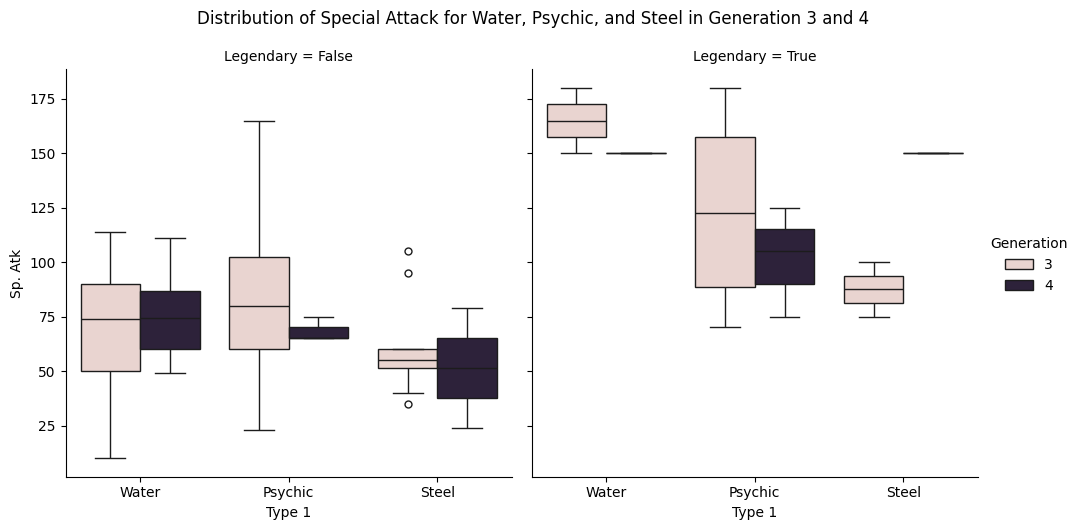

In [ ]:
g=sns.catplot(
    data=data,
    x="Type 1",
    y="Sp. Atk",
    kind="box",
    col="Legendary",
    hue="Generation"
)
g.fig.suptitle("Distribution of Special Attack for Water, Psychic, and Steel in Generation 3 and 4", y=1.05);

A noteable feature of boxplots is that they present only a fairly high level summary of the distribution of values. This is both a strength and a weakness. It’s a **strength** in that it allows us to deal with a fairly large number of categories and still have a readable chart. But it’s a **weakness** in that it hides details of the actual distribution of values.

## Violin plots
This chart type uses kernel density estimation to draw an estimate of the underlying distribution. Because violin plots show an estimate of the distribution, rather than being directly based on the values themselves, they are sometimes a bit more complicated to design, requiring us to make several decisions. [Violin plots explained](https://towardsdatascience.com/violin-plots-explained-fb1d115e023d)

In [ ]:
data = pokemon[
    (pokemon["Type 1"].isin(["Water","Psychic", "Steel"]))
    & pokemon["Generation"].isin([3])
]

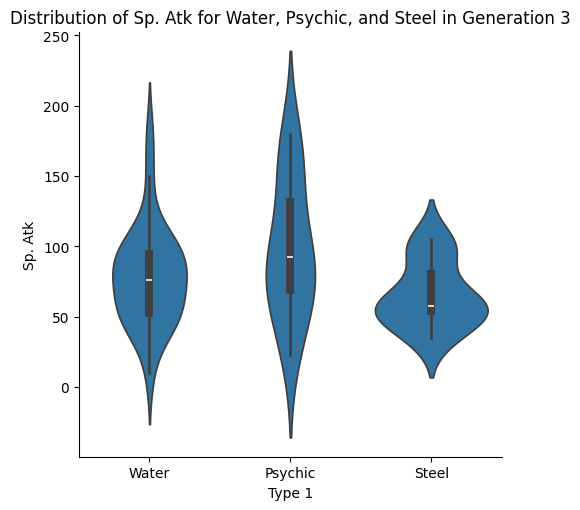

In [ ]:
sns.catplot(
    data=data,
    x="Type 1",
    y="Sp. Atk",
    kind="violin"
    )

plt.title("Distribution of Sp. Atk for Water, Psychic, and Steel in Generation 3");

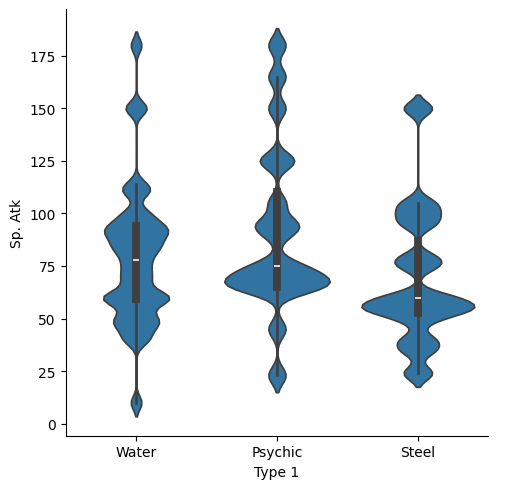

In [ ]:
sns.catplot(
    data=data,
    x="Type 1",
    y="Sp. Atk",
    kind="violin",
    # cut=0,
    bw_method=0.1
    );

We can see this issue in the chart above, where the tip of the distribution of Sp. Atk goes below zero for Water and Psychic. Since the Sp. Atk is measured as a positive point, this obviously makes no sense! We can get the opposite behaviour - i.e. truncate the distribution at the limits of the observed values - by setting `cut` to zero. There’s also a bandwidth parameter `bw` which effectively controls how smooth the distribution is. Setting this value lower results in a more detailed distribuion, which may show useful patterns, but is also more susceptible to being affected by small numbers of data points.

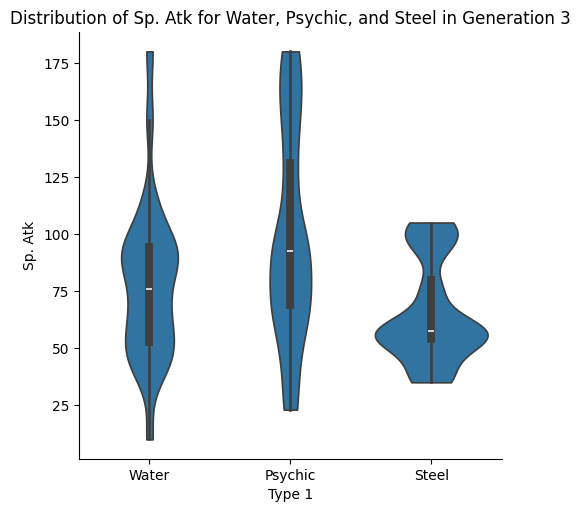

In [ ]:
sns.catplot(
    data=data,
    x="Type 1",
    y="Sp. Atk",
    kind="violin",
    cut=0,
    bw_method=0.3
    )

plt.title("Distribution of Sp. Atk for Water, Psychic, and Steel in Generation 3");

A further option is how we want to scale each violin. Setting the scale argument to 'count' sets the width of
each violin to the number of observations:

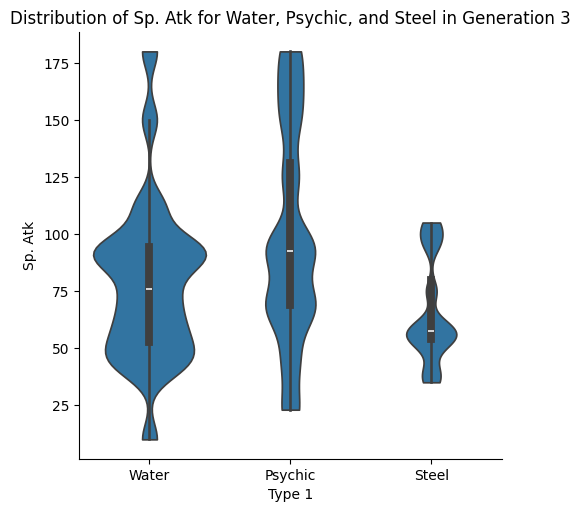

In [ ]:
sns.catplot(
    data=data,
    x="Type 1",
    y="Sp. Atk",
    kind="violin",
    cut=0,
    bw_method=0.2,
    density_norm="count", # "area" means each violin will have the same area,  "width" means each violin will have the same width
    )

plt.title("Distribution of Sp. Atk for Water, Psychic, and Steel in Generation 3");

In [ ]:
data["Type 1"].value_counts()

Water      27
Psychic    12
Steel      12
Name: Type 1, dtype: int64

Because violin plots are symetrical, when we have only two categories we can put one on each side with `split = True`

In [ ]:
data = pokemon[
    (pokemon["Type 1"].isin(["Water","Psychic", "Steel"]))
    & pokemon["Generation"].isin([3,4])
]

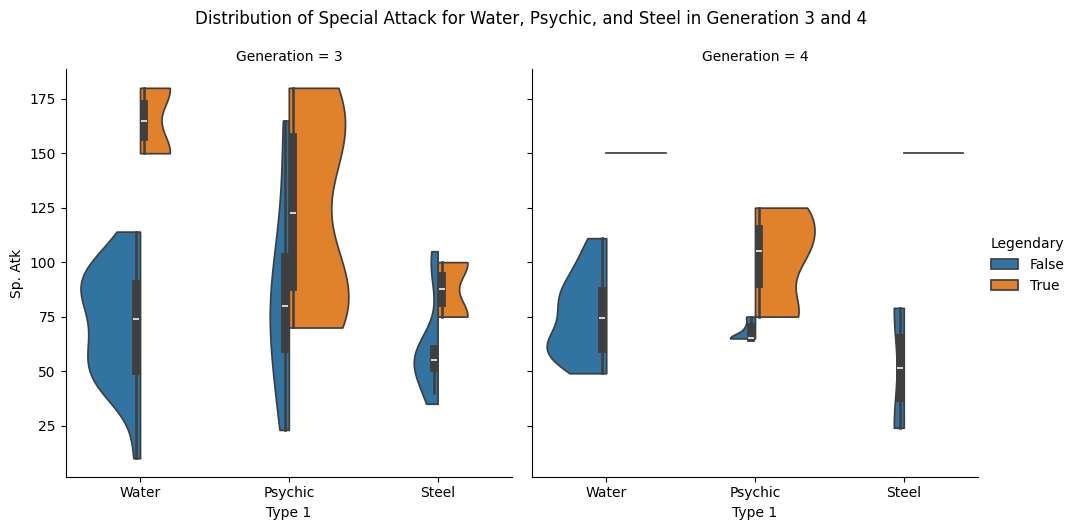

In [ ]:
g=sns.catplot(
    data=data,
    x="Type 1",
    y="Sp. Atk",
    kind="violin",
    cut=0,
    hue="Legendary",
    bw_method=0.5,
    density_norm="count",
    split=True,
    col="Generation"
    )

g.fig.suptitle("Distribution of Special Attack for Water, Psychic, and Steel in Generation 3 and 4", y=1.05);

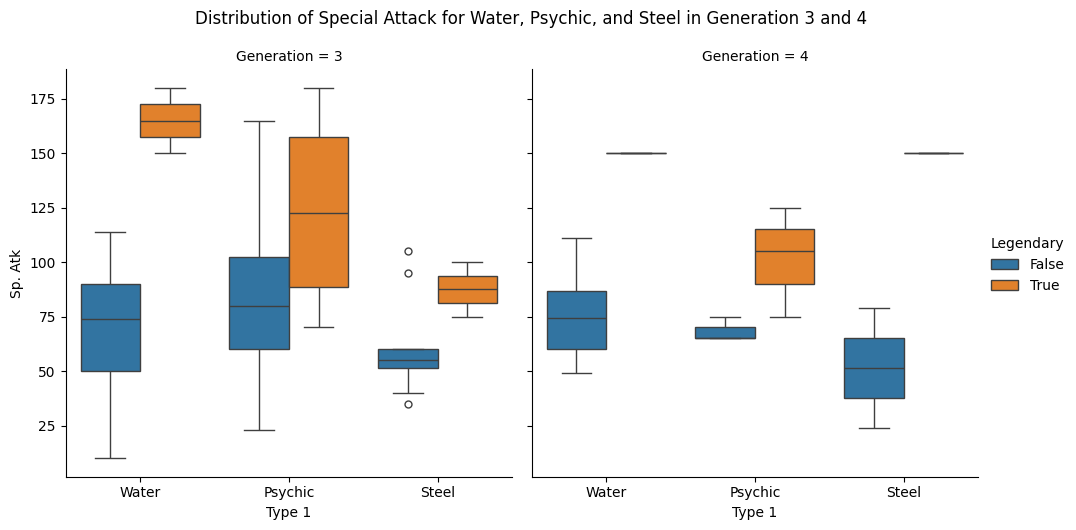

In [ ]:
g=sns.catplot(
    data=data,
    x="Type 1",
    y="Sp. Atk",
    kind="box",
    col_wrap=2,
    hue="Legendary",
    col="Generation"
)
g.fig.suptitle("Distribution of Special Attack for Water, Psychic, and Steel in Generation 3 and 4", y=1.05);

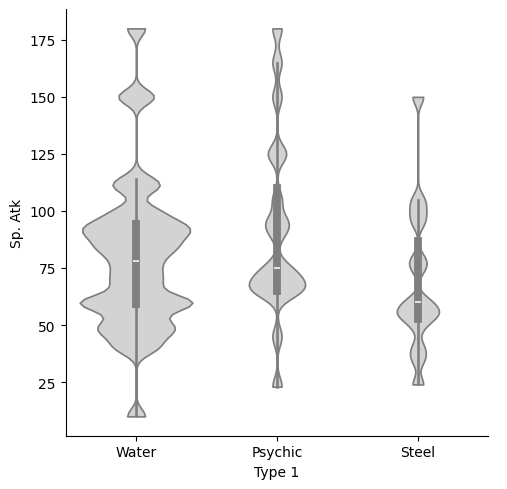

In [ ]:
# sns.violinplot?

# sns.__version__

sns.catplot(data=data,
            kind="violin",
    x="Type 1",
    y="Sp. Atk",
    cut=0,
    bw_method=0.1,
    density_norm="count",
              #  inner="quart",
               color="lightgrey");

# sns.swarmplot(data=data,
#     x="Type 1",
#     y="Sp. Atk",s=4, hue="Legendary")

# sns.stripplot(data=data,
#     x="Type 1",
#     y="Sp. Atk",s=4,  alpha=0.5)

''

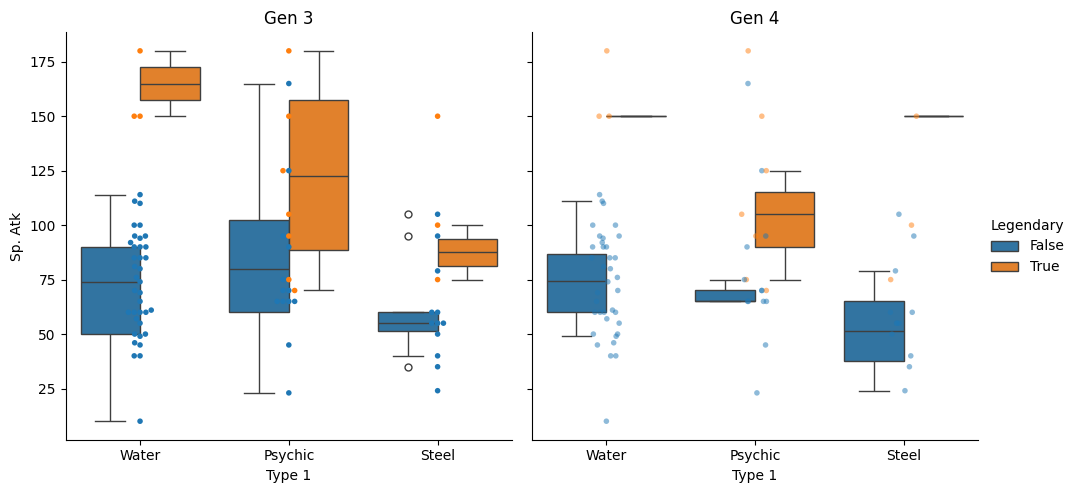

In [ ]:
# JUST FOR FUN

g=sns.catplot(
    data=data,
    x="Type 1",
    y="Sp. Atk",
    kind="box",
    col_wrap=2,
    hue="Legendary",
    col="Generation"
)

# g.axes

sns.stripplot(data=data,
    x="Type 1",
    y="Sp. Atk",s=4, hue="Legendary", alpha=0.5, ax=g.axes[1], legend=False)


sns.swarmplot(data=data,
    x="Type 1",
    y="Sp. Atk",s=4, hue="Legendary", ax=g.axes[0], legend=False)

# # g.axes[0].legend().set_visible(False)
# # g.axes[1].legend().set_visible(False)
# # https://www.geeksforgeeks.org/change-axis-labels-set-title-and-figure-size-to-plots-with-seaborn/
g.axes[0].set_title("Gen 3")
g.axes[1].set_title("Gen 4")

# plt.title("new title")
;